In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle

import torch
import torch.optim as optim
import torch.nn as nn
import torch.nn.functional as F

In [2]:
N_ep = 10 # Number of episodes

In [3]:
# Load data
f = open('replay_memory_0','rb')
dataset = pickle.load(f)

# Data size
num_data = len(dataset)
# Features
X = torch.cat([x[0] for x in dataset]).float()
# Labels
y = torch.from_numpy(np.array([x[1] for x in dataset])).float()

In [4]:
# Network
class net(nn.Module):
    def __init__(self, input_dim=3, output_dim=1, hidden_size=10, hidden_dropout_prob=0):
        super(net, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_size) # input layer -> hidden layer
        self.fc2 = nn.Linear(hidden_size, output_dim) # hidden layer -> output layer
        
    def forward(self, x):
        x = F.leaky_relu(self.fc1(x))
        x = self.fc2(x)
        return x
    
model = net()

In [5]:
#print(model.fc1.weight)
#print(model.fc2.weight)
sample_num=100

In [6]:
print(model(X[sample_num]))
print(y[sample_num])
print(model(X[sample_num])-y[sample_num])

tensor([-0.2147])
tensor(1.00000e-02 *
       -2.2116)
tensor([-0.1926])


In [7]:

optimizer = optim.Adam(model.parameters())

training_loss = []
# Training
for i_ep in range(N_ep):
    for i_data in range(num_data):
        features = X[i_data]
        y_data = y[i_data]
        #features = X
        #y_data = y.view(-1,1)
        
        y_pred = model(features)
        
        #loss = F.smooth_l1_loss(y_pred,y_data)
        loss = torch.mean((y_pred - y_data)**2)
        training_loss.append(loss)
        
        # Optimize the model
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

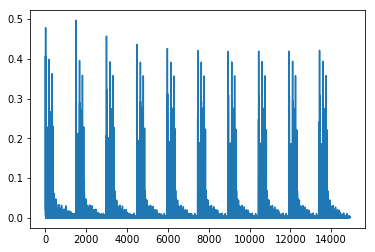

In [8]:
plt.plot(training_loss)
plt.savefig('train_loss_curve.png')
plt.show()

In [9]:
print(model.fc1.weight)
print(model.fc2.weight)

Parameter containing:
tensor([[-0.2662,  0.1195, -0.0371],
        [-0.3491,  0.4955, -0.2995],
        [-0.3617,  0.4659,  0.0193],
        [ 0.1381, -0.1813, -0.0836],
        [-0.4827, -0.3618, -0.4641],
        [-0.2669, -0.1870,  0.4907],
        [-0.4864,  0.1214, -0.1428],
        [-0.0930, -0.1120,  0.4431],
        [ 0.5099, -0.2103,  0.0174],
        [ 0.3330,  0.2727,  0.3218]])
Parameter containing:
tensor([[ 0.2214, -0.0301, -0.0234,  0.0624, -0.3549, -0.0182, -0.0880,
          0.0956,  0.0606,  0.1483]])


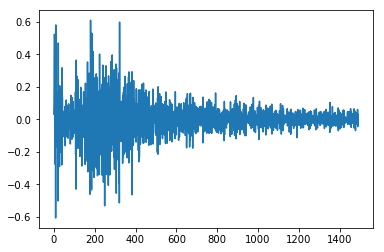

In [10]:
plt.plot(y)
plt.show()

In [11]:
print(model(X[sample_num]))
print(y[sample_num])
print(model(X[sample_num])-y[sample_num])

tensor(1.00000e-03 *
       [-4.5061])
tensor(1.00000e-02 *
       -2.2116)
tensor(1.00000e-02 *
       [ 1.7610])
